# Explorer un corpus

## Imports

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [2]:
path = "../data/txt/"
files = sorted(os.listdir(path))

In [3]:
len(files)

14

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [4]:
chaine = 'Bxl_1849_Tome_II1_Part_5.txt'

In [5]:
type(chaine)

str

In [6]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1849', 'Tome', 'II1', 'Part', '5.txt']

In [7]:
# Accéder à l'année
year = chaine_split[1]
year

'1849'

In [8]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'184'

In [9]:
year[-1]

'9'

In [10]:
year[:3] + '0s'

'1840s'

## Quelques statistiques

In [11]:
all_years = [str(year) for year in range(1847, 1979)]

In [12]:
# defaultdict() lo que hace es decir si bruxelles (key) no tiene valor entonces es 0 sino no se podría incrementar +1
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [13]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 14 bulletins de Bruxelles and 0 de Laeken


In [18]:
#print({count_cities[]})

In [19]:
nb_rap = count_tomes['RptAn']
print(f"{len(files) - nb_rap} documents sont des bulletins et {nb_rap} documents sont des rapports annuels")

13 documents sont des bulletins et 0 documents sont des rapports annuels


In [20]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978


## Visualisation du nombre de bulletins par décennies

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

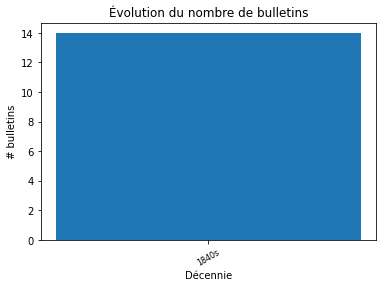

In [21]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# bulletins')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Évolution du nombre de bulletins')
plt.show()